# Split Halves Analysis
This notebook will conduct an analysis of inter-rater reliability using split-halves analysis
1. We first split the dataset into our two conditions: interesting/stable
2. We then take each tower and randomly assign the rating to two groups.
3. We calcualte the mean for each group in each tower
4. Then take the correlation of the two group means across towers.

We run this process many times to get a sampling distribution of correlations, then compare the mean correlation (and CI) of stable to interesting using a t-test

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

## Read in most recet data

In [4]:
df = pd.read_csv('curiotower_raw_data_run_0.csv')
print(df.shape)
df.head()

(24048, 47)


,Unnamed: 0,_id,type,iterationName,condition,prompt,towerID,image_url,num_blocks,stim_version,...,internal_node_id,workerId,hitID,aID,eventType,rt,responses,question_order,stability,viewpoint
0,2,5fffc37cf2e06b2b75acd797,image-button-response,run_0,stable,How stable is this?,curiotower_8_low_0005_1,https://curiotower-tdw.s3.amazonaws.com/curiot...,8.0,tdw-height3Jitter3,...,0.0-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,low,1
1,4,5fffc383f2e06b2b75acd799,image-button-response,run_0,stable,How stable is this?,curiotower_2_low_0000_0,https://curiotower-tdw.s3.amazonaws.com/curiot...,2.0,tdw-height3Jitter3,...,0.0-2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,low,0
2,5,5fffc386f2e06b2b75acd79a,image-button-response,run_0,stable,How stable is this?,curiotower_8_low_0004_1,https://curiotower-tdw.s3.amazonaws.com/curiot...,8.0,tdw-height3Jitter3,...,0.0-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,low,1
3,6,5fffc38af2e06b2b75acd79b,image-button-response,run_0,stable,How stable is this?,curiotower_8_high_0002_1,https://curiotower-tdw.s3.amazonaws.com/curiot...,8.0,tdw-height3Jitter3,...,0.0-3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,high,1
4,7,5fffc38af2e06b2b75acd79c,image-button-response,run_0,stable,How stable is this?,curiotower_8_high_0007_1,https://curiotower-tdw.s3.amazonaws.com/curiot...,8.0,tdw-height3Jitter3,...,0.0-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,high,1


## split into two conditions

In [17]:
df_stable = df[df['condition'] == 'stable']
df_interesting = df[df['condition'] == 'interesting']

## split-halves design

sampling from: stable
sampling from: interesting


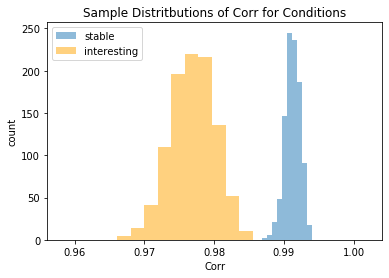

In [61]:
conditions = ['stable', 'interesting']
corr_stable = []
corr_interesting = []
for condition in conditions:
    print('sampling from:', condition)
    df_condition = df[df['condition'] == condition]
    for i in range(0,1000):
        rand_group = np.random.randint(2, size=len(df_condition['towerID']))
        df_condition['rand_group'] = pd.Series(rand_group)

        out = df_condition.pivot_table(index=["towerID"], 
                            columns='rand_group', 
                            values='button_pressed',
                            aggfunc='mean').reset_index()
        out.columns = ['towerID', 'group0', 'group1']
        sample_corr = out['group0'].corr(out['group1'])
        if condition == 'stable':
            corr_stable.append(sample_corr)
        elif condition == 'interesting':
            corr_interesting.append(sample_corr)
            #Spearman brown correction
            #corr_interesting.append(2*sample_corr/(1+sample_corr))



plt.xlim([min(corr_stable + corr_interesting)-0.01, max(corr_stable + corr_interesting)+0.01])

plt.hist(corr_stable, alpha=0.5, label = 'stable')
plt.hist(corr_interesting, alpha = 0.5, color = 'orange', label = 'interesting')
plt.title('Sample Distritbutions of Corr for Conditions')
plt.xlabel('Corr')
plt.ylabel('count')
plt.legend()
plt.show()